In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import torch
from torch import nn

In [2]:
df = pd.read_csv("../data/data.csv")

In [3]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


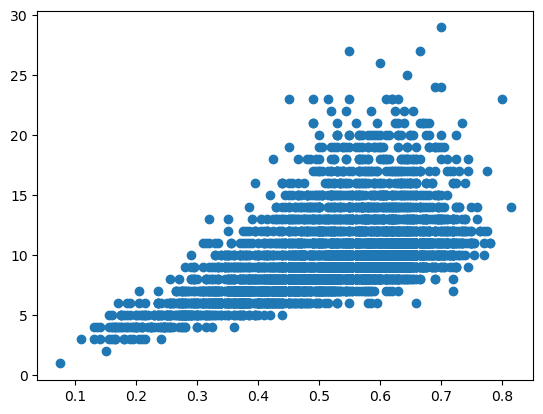

In [4]:
plt.scatter(df["Length"],df["Rings"])

In [5]:
#I don't think I'm going to worry about scaling the data...
target = df["Rings"].values
df= df.drop(["Rings"],axis = 1)
df['Sex'] = pd.Categorical(df['Sex']).codes


In [6]:
X_train,X_test,y_train,y_test = train_test_split(df,target)

In [7]:

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)


print(mean_squared_error(dt.predict(X_train),y_train))
print(mean_squared_error(dt.predict(X_test),y_test))


0.0
8.372248803827752


/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [8]:

rf = RandomForestRegressor()
rf.fit(X_train,y_train)


print(mean_squared_error(rf.predict(X_train),y_train))
print(mean_squared_error(rf.predict(X_test),y_test))

/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.6617055555555555
4.848493014354067


/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/kirakalkus/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [9]:
X_torch = torch.from_numpy(df.values).type(torch.float32)
y_torch = torch.from_numpy(target).unsqueeze(1).type(torch.float32)


In [10]:
X_torch_train,X_torch_test,y_torch_train,y_torch_test = train_test_split(X_torch,y_torch)


In [14]:
#let's build our model
class NNregressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(8, 30)
        self.layer2 = nn.Linear(30,30)
        self.layer3 = nn.Linear(30,30)
        self.layer4 = nn.Linear(30,1) #worried about dimensions...
        self.ReLU = nn.ReLU()
    def forward(self,x):
        
#         return self.layer1(x)
        return self.layer4(self.ReLU(self.layer2(self.ReLU(self.layer1(x)))))
    
nnModel = NNregressor()


In [30]:
optimizer = torch.optim.Adam(params = nnModel.parameters(), lr = .001)
loss_fn = nn.L1Loss()


In [31]:
epochs = 100000

for epoch in range(epochs):
    
    nnModel.train()
    
    #forward pass
    y_pred = nnModel(X_torch_train)
    
    #compute loss
    loss = loss_fn(y_pred, y_torch_train)
    
    mse = mean_squared_error(y_pred.detach().numpy().flatten(),y_torch_train.detach().numpy().flatten())
    
    #Zero gradient
    optimizer.zero_grad()
    
    #backwards loss
    loss.backward()
    
    optimizer.step()
    
    if epoch % 1000 == 0:
        print("Epoch: " +str(epoch)+", Loss: "+str(mse))
    

Epoch: 0, Loss: 3.374761
Epoch: 1000, Loss: 3.3818023
Epoch: 2000, Loss: 3.4012132
Epoch: 3000, Loss: 3.4195676
Epoch: 4000, Loss: 3.3765638
Epoch: 5000, Loss: 3.4047098
Epoch: 6000, Loss: 3.3887293
Epoch: 7000, Loss: 3.374458
Epoch: 8000, Loss: 3.3734248
Epoch: 9000, Loss: 3.4116957
Epoch: 10000, Loss: 3.3850293
Epoch: 11000, Loss: 3.4187725
Epoch: 12000, Loss: 3.4067292
Epoch: 13000, Loss: 3.375696
Epoch: 14000, Loss: 3.3877966
Epoch: 15000, Loss: 3.3861911
Epoch: 16000, Loss: 3.3946154
Epoch: 17000, Loss: 3.4013247
Epoch: 18000, Loss: 3.3785691
Epoch: 19000, Loss: 3.3889189
Epoch: 20000, Loss: 3.3962483
Epoch: 21000, Loss: 3.4069204
Epoch: 22000, Loss: 3.4052093
Epoch: 23000, Loss: 3.3839736
Epoch: 24000, Loss: 3.3791463
Epoch: 25000, Loss: 3.388968
Epoch: 26000, Loss: 3.3840234
Epoch: 27000, Loss: 3.3889594
Epoch: 28000, Loss: 3.3845856
Epoch: 29000, Loss: 3.3838408
Epoch: 30000, Loss: 3.3800733
Epoch: 31000, Loss: 3.382356
Epoch: 32000, Loss: 3.3828194
Epoch: 33000, Loss: 3.379854

In [32]:
nnModel.eval()

y_pred = nnModel(X_torch_test)
    
    #compute loss
#     loss = loss_fn(y_pred, y_torch_train)
    
mse = mean_squared_error(y_pred.detach().numpy().flatten(),y_torch_test.detach().numpy().flatten())

In [33]:
mse

9.769674